## Create Histograms with parameteric bin contents

Create workspace as input to combine

In [4]:
import ROOT as r
fOut = r.TFile("param_ws.root","RECREATE")
wspace = r.RooWorkspace("wspace","wspace")
wspace_import = getattr(wspace,"import")

 Make the RooRealVar variable as the observable for the search

In [6]:
met = r.RooRealVar("met","E_{T}^{miss}",200,1000)
plot = met.frame()

# Signal region

Make a data set for our signal region and import that into the workspace

In [8]:
data_th1 = r.TH1F("data_obs_SR","Data observed in signal region",4,200,1000)
data_th1.SetBinContent(1,100)
data_th1.SetBinContent(2,50)
data_th1.SetBinContent(3,25)
data_th1.SetBinContent(4,10)
data_hist = r.RooDataHist("data_obs_SR","Data observed",r.RooArgList(met),data_th1)
wspace_import(data_hist)
data_hist.plotOn(plot)

TFile::Append:0: RuntimeWarning: Replacing existing TH1: data_obs_SR (Potential memory leak).


<ROOT.RooPlot object ("frame_met_6b1b650") at 0x6b1b650>

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(data_obs_SR): fit range of variable met expanded to nearest bin boundaries: [200,1000] --> [200,1000]
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing dataset data_obs_SR
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing RooRealVar::met


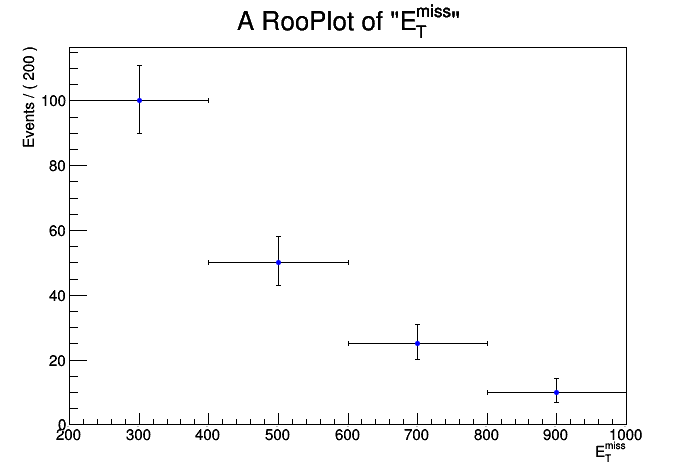

In [9]:
c = r.TCanvas()
plot.Draw()
c.Draw()

Now create the parametric binned template for the background 

Each bin will have its own parameter representing the rate in that bin

In [10]:
bin1 = r.RooRealVar("bkg_SR_bin1","Background yield in signal region, bin 1",100,0,500)
bin2 = r.RooRealVar("bkg_SR_bin2","Background yield in signal region, bin 2",50,0,500)
bin3 = r.RooRealVar("bkg_SR_bin3","Background yield in signal region, bin 3",25,0,500)
bin4 = r.RooRealVar("bkg_SR_bin4","Background yield in signal region, bin 4",10,0,500)

bkg_SR_bins = r.RooArgList()
bkg_SR_bins.add(bin1)
bkg_SR_bins.add(bin2)
bkg_SR_bins.add(bin3)
bkg_SR_bins.add(bin4)

p_bkg = r.RooParametricHist("bkg_SR", "Background PDF in signal region",met,bkg_SR_bins,data_th1)

If we fit this to the data, we should get back the number of data in each bins as the MLEs 

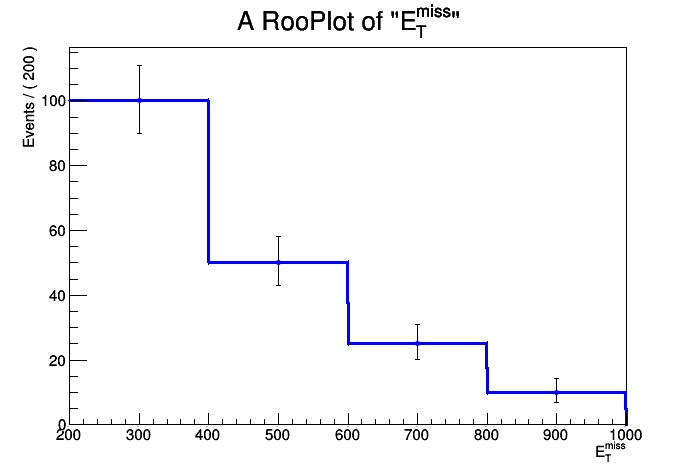

[#1] INFO:Minization -- RooMinuit::optimizeConst: activating const optimization
 **********
 **   13 **MIGRAD        2000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=1186.34 FROM MIGRAD    STATUS=INITIATE       16 CALLS          17 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  bkg_SR_bin1   1.00000e+02   5.00000e+01   2.57889e-01  -3.68986e-04
   2  bkg_SR_bin2   5.00000e+01   2.50000e+01   1.72186e-01  -3.41591e-04
   3  bkg_SR_bin3   2.50000e+01   1.25000e+01   1.18625e-01  -3.49142e-04
   4  bkg_SR_bin4   1.00000e+01   5.00000e+00   7.39156e-02  -4.21714e-04
                               ERR DEF= 0.5
 MIGRAD FAILS TO FIND IMPROVEMENT
 COVARIANCE MATRIX CALCULATED SUCCESSFU

In [11]:
p_bkg.fitTo(data_hist)
p_bkg.plotOn(plot)
c2 = r.TCanvas()
plot.Draw()
c2.Draw()

# Control region

In [12]:
data_CRth1 = r.TH1F("data_obs_CR","Data observed in control region",4,200,1000)
data_CRth1.SetBinContent(1,200)
data_CRth1.SetBinContent(2,100)
data_CRth1.SetBinContent(3,50)
data_CRth1.SetBinContent(4,20)
data_CRhist = r.RooDataHist("data_obs_CR","Data observed",r.RooArgList(met),data_CRth1)
wspace_import(data_CRhist)

False

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(data_obs_CR): fit range of variable met expanded to nearest bin boundaries: [200,1000] --> [200,1000]
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing dataset data_obs_CR


This time the parameters for the histogram in the control region will be functions of those in the signal region

In [13]:
TF = r.RooRealVar("TF","Transfer factor",2) 
TF.setConstant() 

me = r.RooRealVar("muon_eff","Muon efficiency",0,-4,4)

CRbin1 = r.RooFormulaVar("bkg_CR_bin1","Background yield in CR, bin 1","@0*@1*(1+0.005*@2)",r.RooArgList(TF,bin1,me))
CRbin2 = r.RooFormulaVar("bkg_CR_bin2","Background yield in CR, bin 2","@0*@1*(1+0.01*@2)",r.RooArgList(TF,bin2,me))
CRbin3 = r.RooFormulaVar("bkg_CR_bin3","Background yield in CR, bin 3","@0*@1*(1+0.02*@2)",r.RooArgList(TF,bin3,me))
CRbin4 = r.RooFormulaVar("bkg_CR_bin4","Background yield in CR, bin 4","@0*@1*(1+0.04*@2)",r.RooArgList(TF,bin4,me))
  
bkg_CR_bins = r.RooArgList()
bkg_CR_bins.add(CRbin1)
bkg_CR_bins.add(CRbin2)
bkg_CR_bins.add(CRbin3)
bkg_CR_bins.add(CRbin4)

p_CRbkg = r.RooParametricHist("bkg_CR", "Background PDF in control region",met,bkg_CR_bins,data_th1)

Make the usual `_norm` parameters for the two RooParametricHists, this can just be the sum of bins

In [14]:
p_bkg_norm = r.RooAddition("bkg_SR_norm","Total Number of events from background in signal region",bkg_SR_bins)
p_CRbkg_norm = r.RooAddition("bkg_CR_norm","Total Number of events from background in control region",bkg_CR_bins)

wspace_import(p_bkg)
wspace_import(p_bkg_norm)

wspace_import(p_CRbkg)
wspace_import(p_CRbkg_norm,r.RooFit.RecycleConflictNodes())

False

[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing RooParametricHist::bkg_SR
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing RooRealVar::bkg_SR_bin1
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing RooRealVar::bkg_SR_bin2
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing RooRealVar::bkg_SR_bin3
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing RooRealVar::bkg_SR_bin4
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing RooAddition::bkg_SR_norm
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing RooParametricHist::bkg_CR
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing RooFormulaVar::bkg_CR_bin1
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing RooRealVar::TF
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing RooRealVar::muon_eff
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing RooFormulaVar::bkg_CR_bin2


Finally, create a signal histogram template

In [15]:
signal_th1 = r.TH1F("signal_SR","Signal expected in signal region",4,200,1000)
signal_th1.SetBinContent(1,1)
signal_th1.SetBinContent(2,2)
signal_th1.SetBinContent(3,3)
signal_th1.SetBinContent(4,8)
signal_hist = r.RooDataHist("signal","Data observed",r.RooArgList(met),signal_th1)
wspace_import(signal_hist)

False

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(signal): fit range of variable met expanded to nearest bin boundaries: [200,1000] --> [200,1000]
[#1] INFO:ObjectHandling -- RooWorkspace::import(wspace) importing dataset signal


In [16]:
wspace.Print("V")


RooWorkspace(wspace) wspace contents

variables
---------
(TF,bkg_SR_bin1,bkg_SR_bin2,bkg_SR_bin3,bkg_SR_bin4,met,muon_eff)

p.d.f.s
-------
RooParametricHist::bkg_CR[ observable=met _pars=(bkg_CR_bin1,bkg_CR_bin2,bkg_CR_bin3,bkg_CR_bin4) ] = 0.1
RooParametricHist::bkg_SR[ observable=met _pars=(bkg_SR_bin1,bkg_SR_bin2,bkg_SR_bin3,bkg_SR_bin4) ] = 0.05

functions
--------
RooFormulaVar::bkg_CR_bin1[ actualVars=(TF,bkg_SR_bin1,muon_eff) formula="@0*@1*(1+0.005*@2)" ] = 200
RooFormulaVar::bkg_CR_bin2[ actualVars=(TF,bkg_SR_bin2,muon_eff) formula="@0*@1*(1+0.01*@2)" ] = 100
RooFormulaVar::bkg_CR_bin3[ actualVars=(TF,bkg_SR_bin3,muon_eff) formula="@0*@1*(1+0.02*@2)" ] = 50
RooFormulaVar::bkg_CR_bin4[ actualVars=(TF,bkg_SR_bin4,muon_eff) formula="@0*@1*(1+0.04*@2)" ] = 20
RooAddition::bkg_CR_norm[ bkg_CR_bin1 + bkg_CR_bin2 + bkg_CR_bin3 + bkg_CR_bin4 ] = 370
RooAddition::bkg_SR_norm[ bkg_SR_bin1 + bkg_SR_bin2 + bkg_SR_bin3 + bkg_SR_bin4 ] = 185

datasets
--------
RooDataHist::data_obs_SR(me

In [17]:
fOut.WriteTObject(wspace)
fOut.Close()